In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
def RSSandTHETAS(y,x):
	y=np.matrix(y)
	y=y.T
	F=[np.ones(20),x]
	F=np.matrix(F).T
	B=np.matmul(F.T,F)
	M=np.matmul(np.linalg.inv(B),F.T)
	theta=np.matmul(M,y)
	RSS=np.linalg.norm(y-np.matmul(F,theta))**2
	return RSS,theta,B

In [3]:
xlin=[-0.9 + 0.2*i for i in range(10)]+[-0.9 + 0.2*i for i in range(10)]
xsin=[np.sin(np.pi*i) for i in xlin]
y=[0.45,0.41,0.35,0.19,0.27,0.3,0.19,0.21,0.28,0.23,0.33,0.4,0.44,0.18,0.32,0.05,0.29,0.34,0.45,0.05]
RSS_lin,theta_lin,B_lin=RSSandTHETAS(y,xlin)
RSS_sin,theta_sin,B_sin=RSSandTHETAS(y,xsin)
print(RSS_lin)
print(RSS_sin)
print(theta_lin)
print(theta_sin)

0.20877484848484848
0.24670568037294097
[[ 0.2865    ]
 [-0.09348485]]
[[ 0.2865    ]
 [-0.04444021]]


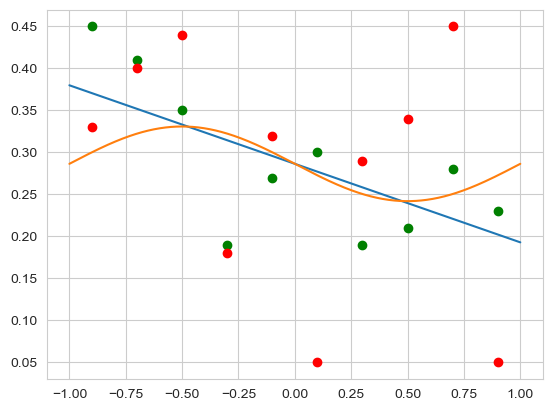

In [4]:
plt.scatter(xlin[:10],y[:10],color='green')
plt.scatter(xlin[:10],y[10:],color='red')
x=np.linspace(-1,1,1000)
plt.plot(x,theta_lin[0,0]+theta_lin[1,0]*x)
plt.plot(x,theta_sin[0,0]+theta_sin[1,0]*np.sin(np.pi*x))

Посчитаны RSS и ОМНК для обеих моделей, проведем тест на адекватность моделей:

In [5]:
R0=0
for i in range(10):
	R0+=(y[i]-(y[i]+y[i+10])/2)**2+(y[i+10]-(y[i]+y[i+10])/2)**2
print(R0)

0.08795


In [6]:
print((RSS_lin-R0)/R0*10/8)
print((RSS_sin-R0)/R0*10/8)
print(1-st.f.cdf((RSS_lin-R0)/R0*10/8,dfn=8,dfd=10))
print(1-st.f.cdf((RSS_sin-R0)/R0*10/8,dfn=8,dfd=10))

1.7172377556118317
2.256334286141856
0.20832453042027366
0.11375488557825675


Принимаем линейную гипотезу. 

In [7]:
RSS=RSS_lin
theta=theta_lin
B=B_lin
print(theta)

[[ 0.2865    ]
 [-0.09348485]]


Перейдем к оценке параметров:

In [8]:
sigma=(RSS/18)**0.5
print(sigma)
print(sigma**2)

0.10769680911523188
0.011598602693602694


Построим доверительные интервалы. Альфу везде берем 0.05

In [9]:
#sigma2: sigma2^-1*RSS ~ X^2_{18}
print('('+str(RSS/st.chi2.ppf(0.975,df=18))+'; '+str(RSS/st.chi2.ppf(0.025,df=18))+')')
#если нужна сигма обычная
print('('+str((RSS/st.chi2.ppf(0.975,df=18))**0.5)+'; '+str((RSS/st.chi2.ppf(0.025,df=18))**0.5)+')')

(0.006622227442952948; 0.02536523949892257)
(0.0813770695156378; 0.15926468377805097)


In [10]:
#a,b: l^T*(theta^-theta)/(sigma*(l^T*B_inv)*l)**0.5) ~ t_{18}
B_inv=np.linalg.inv(B)
print(B_inv)

[[ 5.00000000e-02 -6.72862439e-18]
 [-6.72862439e-18  1.51515152e-01]]


In [11]:
#для а берем l=(1,0)^T, тогда (theta^-theta)/(sigma*B_inv[0,0]**0.5) ~ t_{18}
a_bar=theta[0,0]
a_lower=a_bar-st.t.ppf(0.975,df=18)*sigma*(B_inv[0,0])**0.5
a_upper=a_bar-st.t.ppf(0.025,df=18)*sigma*(B_inv[0,0])**0.5
print('('+str(a_lower)+'; '+str(a_upper)+')')

(0.23590614457821524; 0.3370938554217848)


In [12]:
#для b берем l=(0,1)^T, тогда (theta^-theta)/(sigma*B_inv[1,1]**0.5) ~ t_{18}
b_bar=theta[1,0]
b_lower=b_bar-st.t.ppf(0.975,df=18)*sigma*(B_inv[1,1])**0.5
b_upper=b_bar-st.t.ppf(0.025,df=18)*sigma*(B_inv[1,1])**0.5
print('('+str(b_lower)+'; '+str(b_upper)+')')

(-0.18155744606070623; -0.005412250908990765)


Разберемся с выбросами.

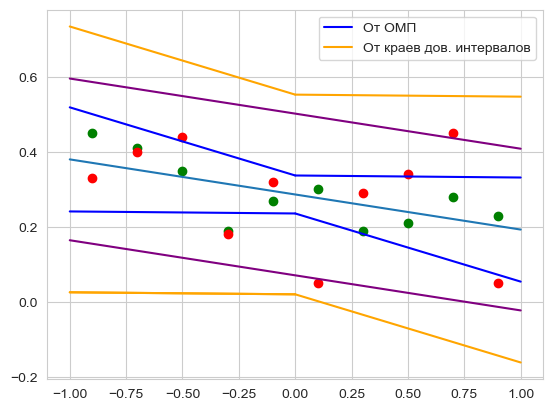

In [16]:
plt.scatter(xlin[:10],y[:10],color='green')
plt.scatter(xlin[:10],y[10:],color='red')
x=np.linspace(-1,1,1000)
x_plus=np.linspace(0,1,1000)
x_minus=np.linspace(-1,0,1000)
plt.plot(x,theta_lin[0,0]+theta_lin[1,0]*x)
plt.plot(x,theta_lin[0,0]+theta_lin[1,0]*x+2*sigma,color='purple')
plt.plot(x,theta_lin[0,0]+theta_lin[1,0]*x-2*sigma,color='purple')

plt.plot(x_plus,a_upper+b_upper*x_plus,color='blue', label = 'От ОМП')
plt.plot(x_minus,a_upper+b_lower*x_minus,color='blue')
plt.plot(x_plus,a_lower+b_lower*x_plus,color='blue')
plt.plot(x_minus,a_lower+b_upper*x_minus,color='blue')
plt.plot(x_plus,a_upper+b_upper*x_plus+2*sigma,color='orange',label = 'От краев дов. интервалов')
plt.plot(x_minus,a_upper+b_lower*x_minus+2*sigma,color='orange')
plt.plot(x_plus,a_lower+b_lower*x_plus-2*sigma,color='orange')
plt.plot(x_minus,a_lower+b_upper*x_minus-2*sigma,color='orange')
plt.plot(x_minus,a_lower+b_upper*x_minus-2*sigma,color='orange')
plt.legend()
None

Подозрительными являются красные точки в 0.1 и в 0.7.

In [30]:
#доверительные интервалы в точке 0.1 и 0.7:
print('В 0.1: ('+ str(a_bar+b_bar*0.1+st.t.ppf(0.025,df=18)*sigma*(B_inv[0,0]+(B_inv[0,1]+B_inv[1,0])*0.1+B_inv[1,1]*0.01)**0.5)+'; '+ str(a_bar+b_bar*0.1-st.t.ppf(0.025,df=18)*sigma*(B_inv[0,0]+(B_inv[0,1]+B_inv[1,0])*0.1+B_inv[1,1]*0.01)**0.5)+')')
print(y[15])
print('В 0.7: ('+ str(a_bar+b_bar*0.7+st.t.ppf(0.025,df=18)*sigma*(B_inv[0,0]+(B_inv[0,1]+B_inv[1,0])*0.7+B_inv[1,1]*0.49)**0.5)+'; '+ str(a_bar+b_bar*0.7-st.t.ppf(0.025,df=18)*sigma*(B_inv[0,0]+(B_inv[0,1]+B_inv[1,0])*0.7+B_inv[1,1]*0.49)**0.5)+')')
print(y[18])

В 0.1: (0.2257968071796257; 0.3285062231234047)
0.05
В 0.7: (0.14130747694404816; 0.30081373517716403)
0.45


Выбросов не обнаружено. Рисовать это тяжело.

Пробуем снизить размерность:

In [14]:
x=np.array(xlin)
R01=(b_bar*np.linalg.norm(x))**2
print(R01/RSS*18)
print(1-st.f.cdf(R01/RSS*18,dfn=1,dfd=18))

4.973025892762539
0.03871523092297413
